In [1]:
from __future__ import print_function
from keras import backend as K
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import *

epochs = 16
batch_size = 64

x_train = np.load("here/train.npy")
y_train = np.load("here/Y_train.npy")
x_test = np.load("here/test.npy")
y_test = np.load("here/Y_test.npy")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


Using TensorFlow backend.


(33600, 28, 28, 3)
(33600, 96)
(14400, 28, 28, 3)
(14400, 96)


In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 32, kernel_size=(7,7), padding='Same', activation = 'relu', input_shape = (28,28,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)),
  tf.keras.layers.Flatten(),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(96, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# summarize history for accuracy
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        4736      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6423552   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                98400     
Total params: 6,526,816
Trainable params: 6,526,752
Non-trainable para

In [3]:
datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    height_shift_range=0.1)


datagen.fit(x_train)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Epoch 1/16
525/525 [==============================] - 14s 27ms/step - loss: 1.4051 - acc: 0.5793 - val_loss: 0.6402 - val_acc: 0.8348
Epoch 2/16
525/525 [==============================] - 13s 24ms/step - loss: 0.4109 - acc: 0.8425 - val_loss: 0.4405 - val_acc: 0.8315
Epoch 3/16
525/525 [==============================] - 12s 23ms/step - loss: 0.3434 - acc: 0.8752 - val_loss: 0.5476 - val_acc: 0.8226
Epoch 4/16
525/525 [==============================] - 12s 24ms/step - loss: 0.2574 - acc: 0.9036 - val_loss: 0.1906 - val_acc: 0.9286
Epoch 5/16
525/525 [==============================] - 12s 23ms/step - loss: 0.2275 - acc: 0.9164 - val_loss: 0.2056 - val_acc: 0.9231
Epoch 6/16
525/525 [==============================] - 12s 23ms/step - loss: 0.1929 - acc: 0.9316 - val_loss: 0.1520 - val_acc: 0.9442
Epoch 7/16
525/525 [==============================] - 12s 24ms/step - loss: 0.1970 - acc: 0.9318 - val_loss: 0.2114 - val_acc: 0.9289
Epoch 8/16
525

In [4]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


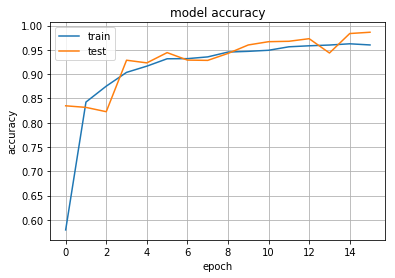

In [5]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("accuracy.jpg")

plt.show()

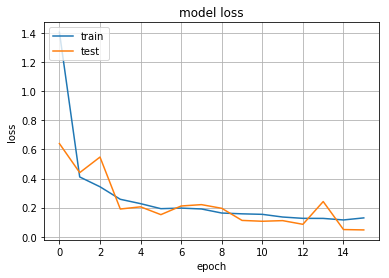

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("loss.jpg")
plt.show()

In [7]:
pr =model.predict(x_test)

In [8]:
model.evaluate(x_test, y_test)


14400/14400 [==============================] - 1s 63us/sample - loss: 0.0470 - acc: 0.9862


[0.04702091190465243, 0.98618054]

In [13]:
pred = []
for i in pr:
    x=np.argmax(i)
    pred.append(x)
pred = np.array(pred)

truth = []
for i in y_test:
    x=np.argmax(i)
    truth.append(x)
truth = np.array(truth)
# truth.shape

(14400,)

In [14]:
f1 = f1_score(truth, pred, average="macro")


In [15]:
f1

0.9861372946656655

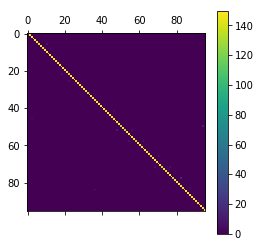

In [17]:
cm = np.array(confusion_matrix(truth,pred),dtype = np.float32)

np.save("confusion_matrix.npy",cm)
plt.matshow(cm)
plt.colorbar()
plt.savefig("confusion.jpg")

In [18]:
model.save_weights("line_1.h5")